In [1]:
# Import Dependencies
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from citipy import citipy

In [2]:
# Create a set of random latitude and longitide combinations
lats = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [5]:
# Import the requests library
import requests
# Import the API key
from config import weather_api_key

In [6]:
# Import datetime module
from datetime import datetime

In [7]:
# Build URL for OpenWeatherMap
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key

In [12]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print('Beginning Data Retrieval')
print('------------------------')

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0) and (i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ', '+')

    # Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')

    # Add 1 to record count
    record_count += 1

    # Ren an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']

        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list
        city_data.append({
            'City': city.title(),
             'Lat': city_lat,
             'Lng': city_lng,
             'Max Temp': city_max_temp,
             'Humidity': city_humidity,
             'Cloudiness': city_clouds,
             'Wind Speed': city_wind,
             'Country': city_country,
             'Date': city_date})
    
    except:
        print('City not found. Skipping...')
        pass

# Indicate that Data Loading is complete
print('------------------------')
print('Data Retrieval Complete')
print('------------------------')


rd 8 of Set 4 | sladkovo
Processing Record 9 of Set 4 | stornoway
Processing Record 10 of Set 4 | clyde river
Processing Record 11 of Set 4 | thinadhoo
Processing Record 12 of Set 4 | sitka
Processing Record 13 of Set 4 | chokurdakh
Processing Record 14 of Set 4 | dikson
Processing Record 15 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 16 of Set 4 | shaowu
Processing Record 17 of Set 4 | alofi
Processing Record 18 of Set 4 | bocas del toro
Processing Record 19 of Set 4 | tefe
Processing Record 20 of Set 4 | prado
Processing Record 21 of Set 4 | orillia
Processing Record 22 of Set 4 | kulhudhuffushi
Processing Record 23 of Set 4 | avera
Processing Record 24 of Set 4 | sisimiut
Processing Record 25 of Set 4 | cabano
Processing Record 26 of Set 4 | kathmandu
Processing Record 27 of Set 4 | terney
Processing Record 28 of Set 4 | saleaula
City not found. Skipping...
Processing Record 29 of Set 4 | krasnoarmeysk
Processing Record 30 of Set 4 | tomatlan
Processing Record 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,50.00,95,48,3.00,NZ,2021-04-15 19:08:35
1,Butaritari,3.0707,172.7902,82.08,74,100,10.33,KI,2021-04-15 19:11:19
2,Ushuaia,-54.8000,-68.3000,53.60,32,20,5.75,AR,2021-04-15 19:10:14
3,Hermanus,-34.4187,19.2345,66.00,74,15,7.00,ZA,2021-04-15 19:11:19
4,Kribi,2.9500,9.9167,81.07,81,78,7.52,CM,2021-04-15 19:11:19
5,Lakes Entrance,-37.8811,147.9810,51.01,90,47,14.54,AU,2021-04-15 19:11:20
6,Chuy,-33.6971,-53.4616,69.24,85,100,4.79,UY,2021-04-15 19:08:37
7,Spremberg,51.5697,14.3736,36.00,84,100,3.00,DE,2021-04-15 19:11:21
8,Sioux Lookout,50.1001,-91.9170,39.20,56,20,9.22,CA,2021-04-15 19:11:21
9,Laguna,38.4210,-121.4238,70.00,39,1,5.75,US,2021-04-15 19:11:21


In [17]:
# Rearrange the columns
new_col_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_col_order]

In [18]:
# Check that columns were rearranged
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-04-15 19:08:35,-46.1927,168.8643,50.00,95,48,3.00
1,Butaritari,KI,2021-04-15 19:11:19,3.0707,172.7902,82.08,74,100,10.33
2,Ushuaia,AR,2021-04-15 19:10:14,-54.8000,-68.3000,53.60,32,20,5.75
3,Hermanus,ZA,2021-04-15 19:11:19,-34.4187,19.2345,66.00,74,15,7.00
4,Kribi,CM,2021-04-15 19:11:19,2.9500,9.9167,81.07,81,78,7.52


In [20]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [21]:
# Extract relevant fields from the df for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

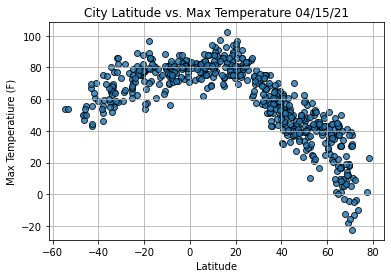

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
            max_temps,
            edgecolors='black',
            linewidths=1,
            marker = 'o',
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperatiure (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

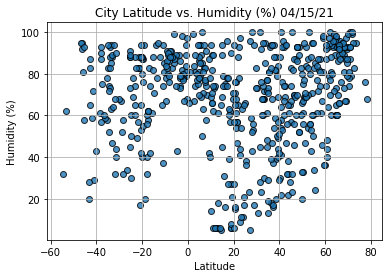

In [24]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats,
            humidity,
            edgecolors='black',
            linewidths=1,
            marker = 'o',
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity (%) ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show plot
plt.show()

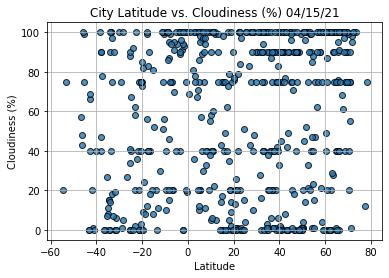

In [25]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolors='black',
            linewidths=1,
            marker = 'o',
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()

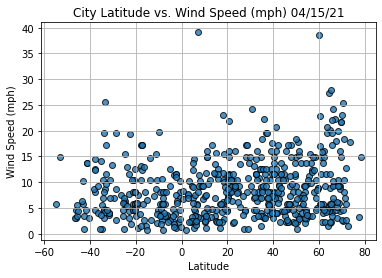

In [26]:
# Build the scatter plot for latitude vs wind speed
plt.scatter(lats,
            wind_speed,
            edgecolors='black',
            linewidths=1,
            marker = 'o',
            alpha=0.8,
            label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed (mph) ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()

In [39]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line 'y values' from the slope and intercept
    regress_values = x_values * slope + intercept

    # Get the equation of the line
    line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

    # Create a scotter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')

    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = 'red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
# Create Northern and Southern Hemisphere dfs
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 00)]

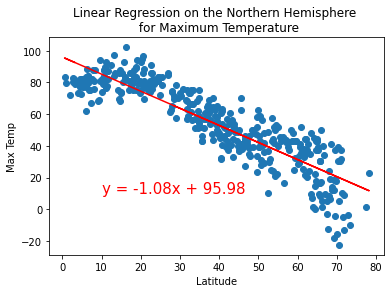

In [41]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10, 10))

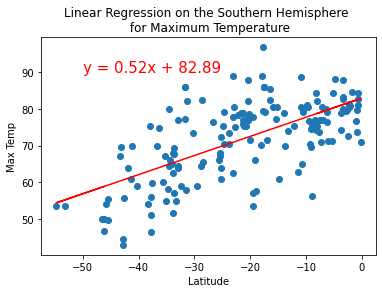

In [44]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50, 90))

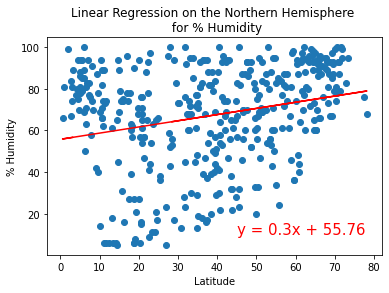

In [48]:
# Linear regression on Northern Hemisphere for Humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Plot regression
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (45, 10))

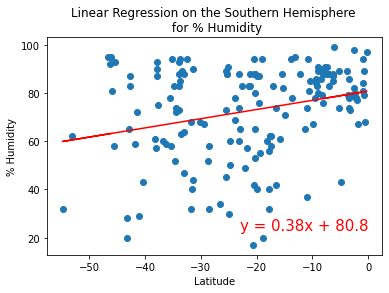

In [56]:
# Linear regression on Southern Hemisphere for Humidity
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Plot regression
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-23, 23))

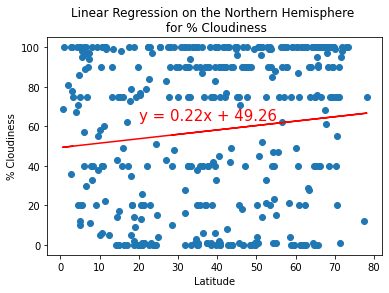

In [59]:
# Linear regression on Northern Hemisphere for Cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Plot regression
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (20, 63))

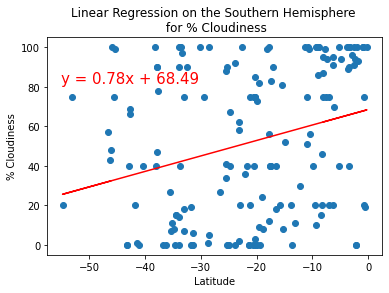

In [65]:
# Linear regression on Southern Hemisphere for Cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Plot regression
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-55, 82))

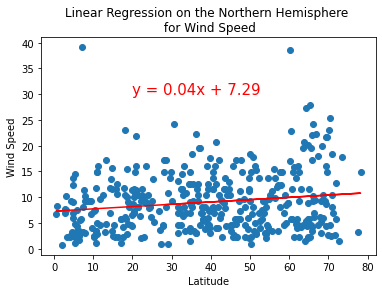

In [67]:
# Linear regression on Northern Hemisphere for Wind Speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Plot regression
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (20, 30))

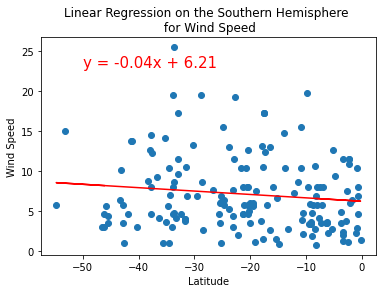

In [69]:
# Linear regression on Southern Hemisphere for Wind Speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Plot regression
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-50, 23))